## For 3D visualization of the Arena itself after Calibration. To figure out the proper alingment for border detection - 


## Raw Calibration data: 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


CALIB1 = pd.read_csv(root+'BPositions_CALIBRATION_20210610-111132/position_20210610-111132.txt',sep=" ", header=None)
file = CALIB1
import plotly.express as px
fig = px.line_3d( x=file[1], 
                   y=file[3], 
                   z=file[2],)

fig.show()

## Rotated and centered Calib data 

In [1]:
##(xcosθ−ysinθ ,xsinθ+ycosθ).
def rotation_correction_points(position_data,alpha=1.7):
    alpha = (alpha) * np.pi / 180
    rot_position_data = position_data
    rot_position_data[1] = position_data[1] * np.cos(alpha) - position_data[3] * np.sin(alpha)
    rot_position_data[3] = position_data[1] * np.sin(alpha) + position_data[3] * np.cos(alpha)
    return rot_position_data

In [24]:

root = '//10.153.170.3/storage2/fabian/data/project/CALIBRATION/'
figures = 'C:/Users/Fabian/Desktop/Analysis/Round3_FS03_FS06/Figures/'

CALIB1 = pd.read_csv(root+'BPositions_CALIBRATION_20210610-111132/position_20210610-111132.txt',sep=" ", header=None)
CALIB2  = pd.read_csv(root+'BPositions_CALIBRATION_20210610-111759/position_20210610-111759.txt',sep=" ", header=None)    
CALIB3 = pd.read_csv(root+'BPositions_CALIBRATION_20210610-112031/position_20210610-112031.txt',sep=" ", header=None)    
xcut_pre_offset=-.25
ycut_pre_offset=.8
CALIB1[1]= CALIB1[1]-xcut_pre_offset
CALIB1[3]= CALIB1[3]-ycut_pre_offset
file = rotation_correction_points(CALIB1)
#file = CALIB1
import plotly.express as px
fig = px.line_3d( x=file[1], 
                   y=file[3], 
                   z=file[2],)


#fig.update_traces(contours_z=dict(show=True, usecolormap=True,
 #                                 highlightcolor="limegreen", project_z=True))
fig.show()


## Add rotation correction 2D: 
    

## Easiest is to have it all centered in 0.0 then there is no need to allign beacons but will need to allign all the positions. First Translate then rotate! 


### Offset data - taken experimentaly from the calibration file from corners of arena from 3D file above 

In [7]:
x_max, x_min = 0.12, -0.62
x_offset = x_max - (x_max - x_min)/2
y_max, y_min = 1.602,  0
y_offset = y_max - (y_max - y_min)/2
print(x_offset,y_offset)

-0.25 0.801


## Now plots with different offsets and calib points - had a bug where rotation was correcting for X and Z not x and Y - FIXED!

## TRANSLATION After and Before 

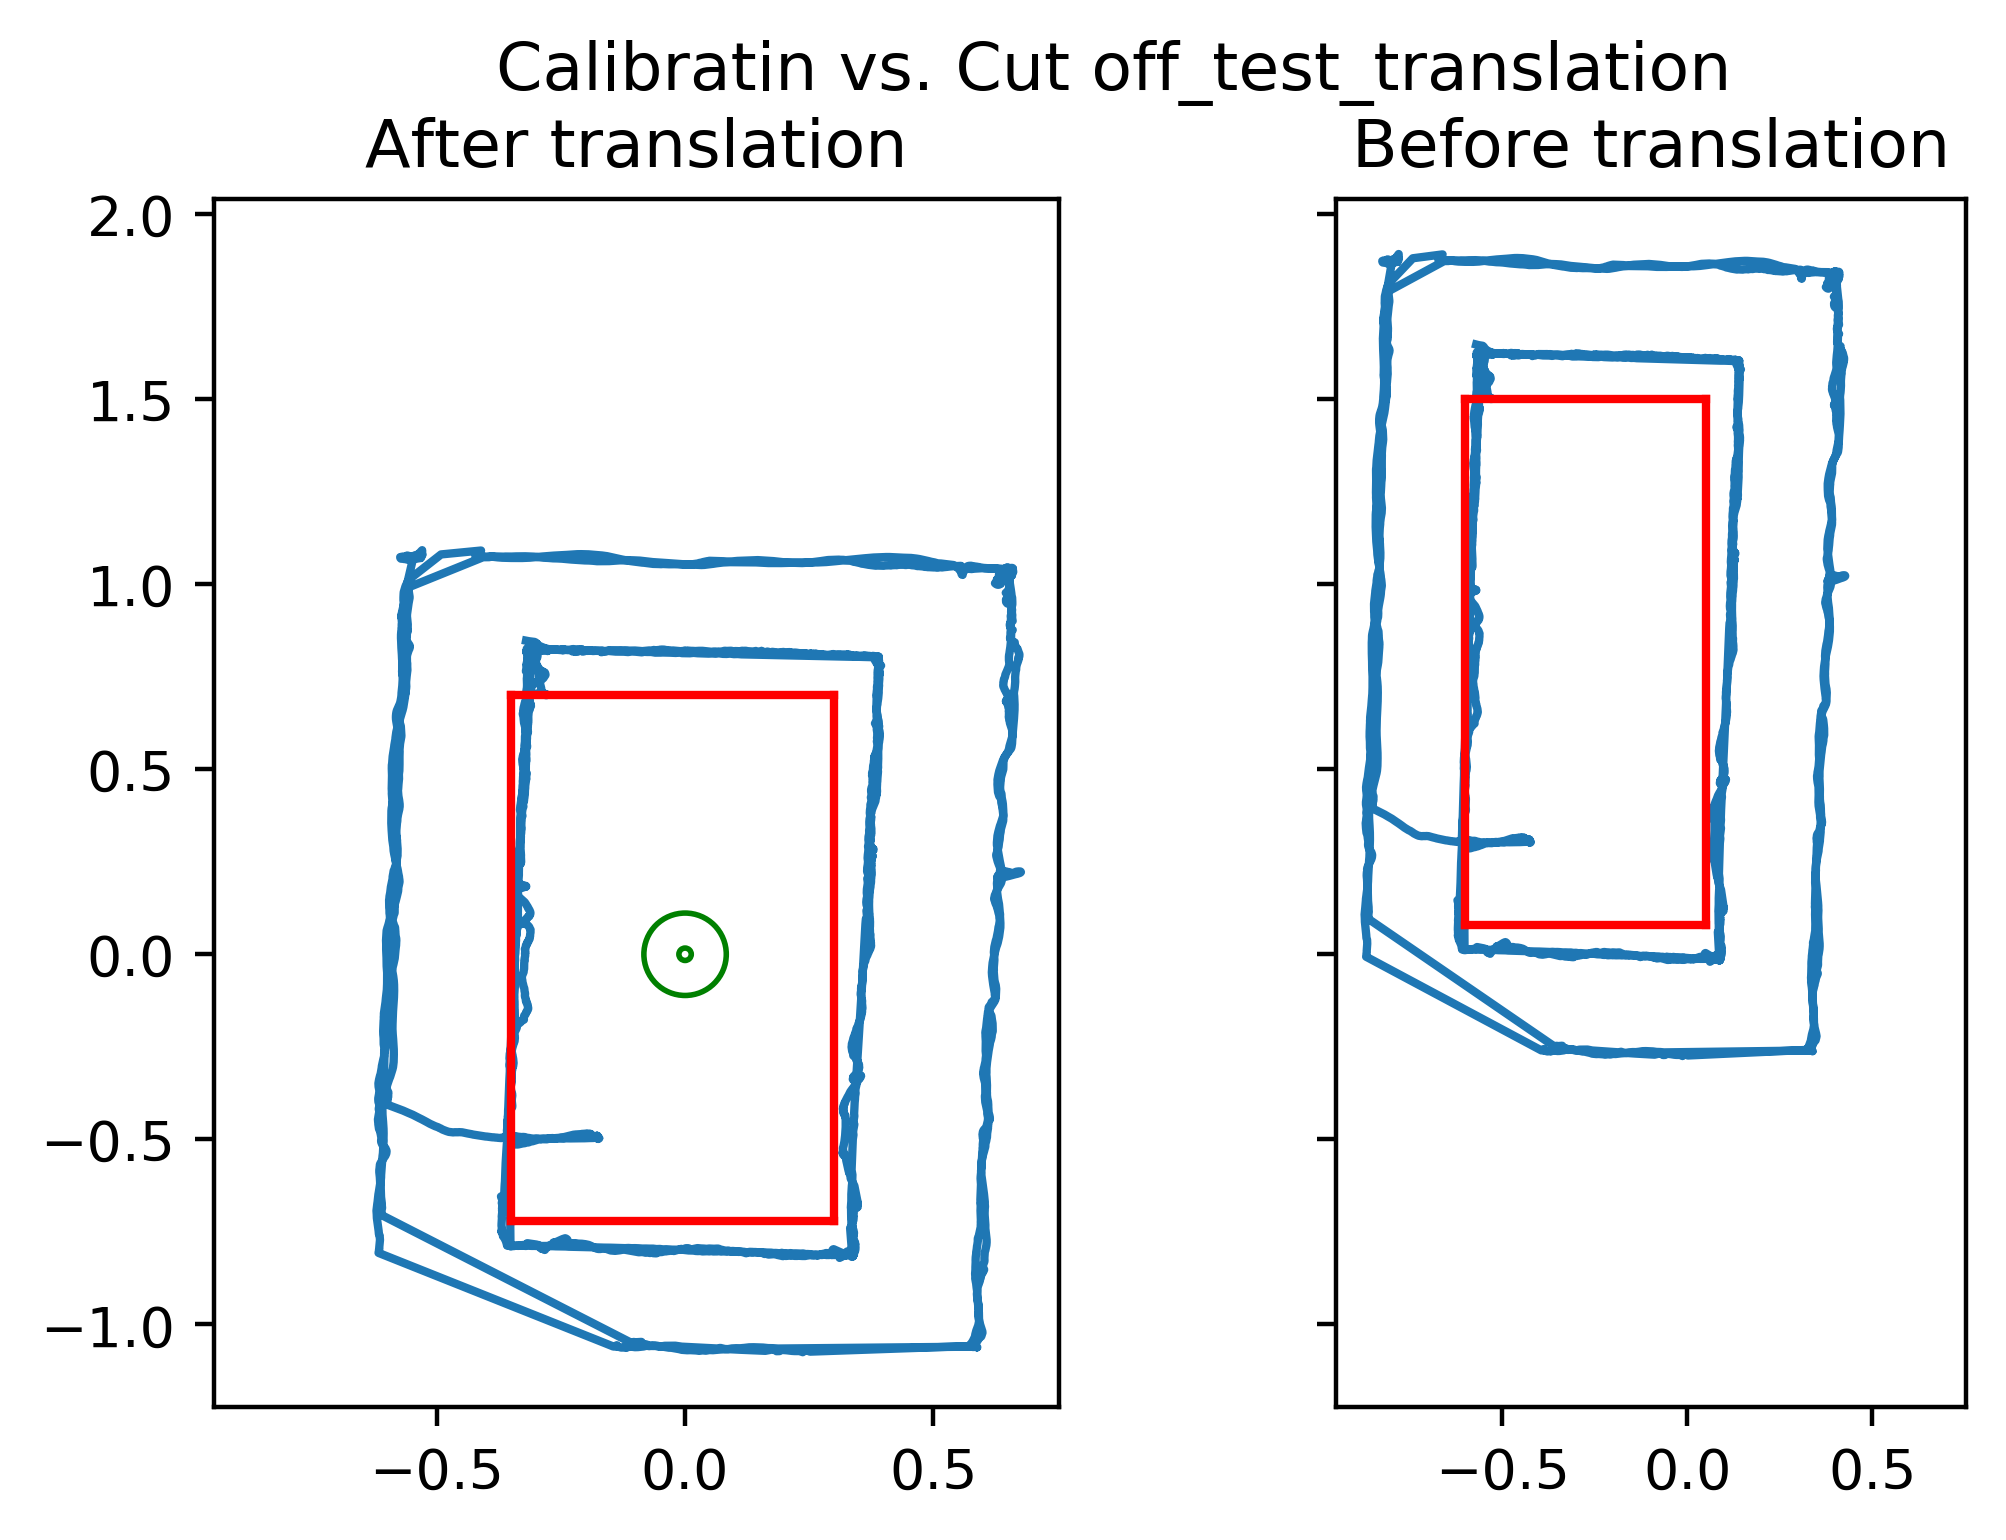

In [25]:
X_cut_min = -.6
Y_cut_max = 1.5
X_cut_max = .05
Y_cut_min = .08

xcut_pre_offset=-.25
ycut_pre_offset=.8
cut=0
CALIB1 = pd.read_csv(root+'BPositions_CALIBRATION_20210610-111132/position_20210610-111132.txt',sep=" ", header=None)    
CALIB1[1]= CALIB1[1]-xcut_pre_offset
CALIB1[3]= CALIB1[3]-ycut_pre_offset

rot_position_data=  rotation_correction_points(CALIB1,alpha=0)
CALIB1 = pd.read_csv(root+'BPositions_CALIBRATION_20210610-111132/position_20210610-111132.txt',sep=" ", header=None)
#rot_position_data = position_data
xcut_offset=-.25
ycut_offset=-.8
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True,dpi=400, sharey=True)
fig.suptitle("Calibratin vs. Cut off_test_translation")
ax1.plot(rot_position_data[1],rot_position_data[3])
ax1.plot([(X_cut_min+cut)-xcut_offset,(X_cut_max-cut)-xcut_offset],[(Y_cut_max-cut)+ycut_offset,(Y_cut_max-cut)+ycut_offset] ,'r-')
ax1.plot([(X_cut_min+cut)-xcut_offset,(X_cut_min+cut)-xcut_offset],[(Y_cut_min+cut)+ycut_offset,(Y_cut_max-cut)+ycut_offset] ,'r-')
ax1.plot([(X_cut_max-cut)-xcut_offset,(X_cut_max-cut)-xcut_offset],[(Y_cut_min+cut)+ycut_offset,(Y_cut_max-cut)+ycut_offset] ,'r-')
ax1.plot([(X_cut_max-cut)-xcut_offset,(X_cut_min+cut)-xcut_offset],[(Y_cut_min+cut)+ycut_offset,(Y_cut_min+cut)+ycut_offset] ,'r-')
ax1.scatter(0,0,s=220,marker='o', facecolors='none', edgecolors='green') 
ax1.scatter(0,0,s=20,marker='.', facecolors='none', edgecolors='green') 
ax1.set_title('After translation')

ax2.plot(CALIB1[1],CALIB1[3])
ax2.plot([(X_cut_min+cut),(X_cut_max-cut)],[(Y_cut_max-cut),(Y_cut_max-cut)] ,'r-')
ax2.plot([(X_cut_min+cut),(X_cut_min+cut)],[(Y_cut_min+cut),(Y_cut_max-cut)] ,'r-')
ax2.plot([(X_cut_max-cut),(X_cut_max-cut)],[(Y_cut_min+cut),(Y_cut_max-cut)] ,'r-')
ax2.plot([(X_cut_max-cut),(X_cut_min+cut)],[(Y_cut_min+cut),(Y_cut_min+cut)] ,'r-')
ax2.set_title('Before translation')
plt.gca().set_aspect('equal')
plt.savefig('%sCalibratin vs. Cut off _test_translation.png'%(figures), dpi = 400)
plt.show()

### Corrected Translation and then Rotation 

In [26]:
x_max, x_min = 0.12, -0.62
x_offset = x_max - (x_max - x_min)/2
y_max, y_min = 1.602,  0
y_offset = y_max - (y_max - y_min)/2
print(x_offset,y_offset)

-0.25 0.801


area 1.1431 M*2


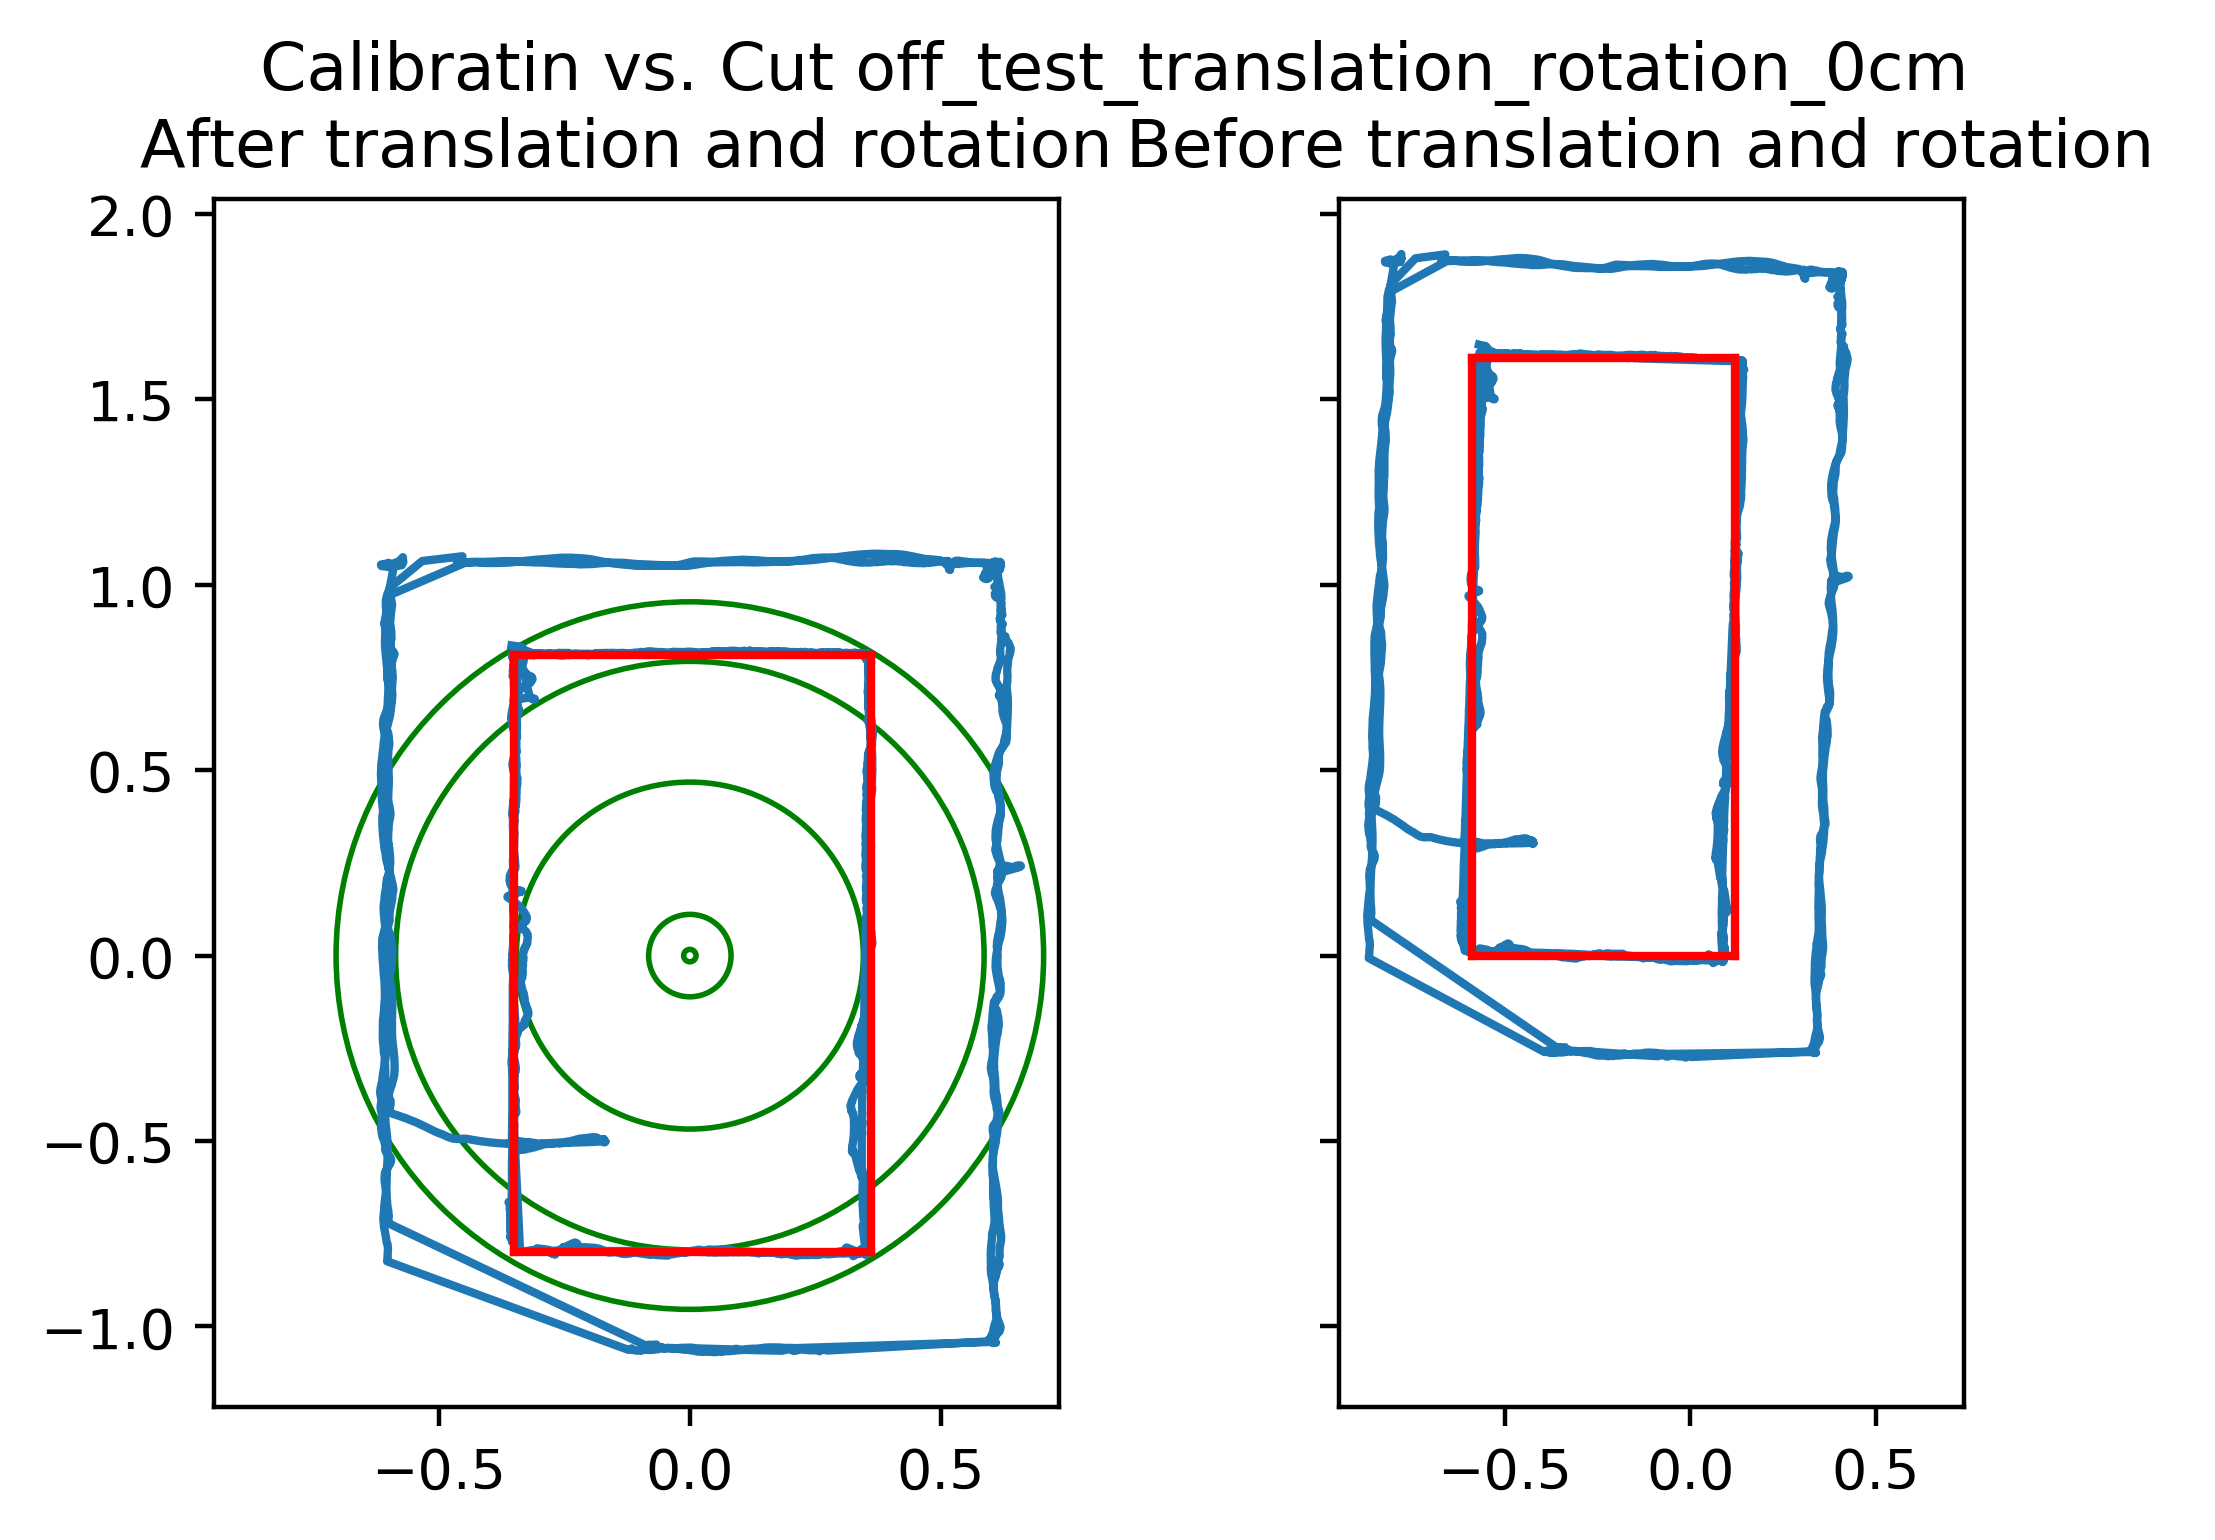

In [70]:
X_cut_min = -.59
Y_cut_max = 1.61
X_cut_max = .12
Y_cut_min = .00
print("area %s M*2" %((X_cut_max-X_cut_min)*(Y_cut_max-Y_cut_min))) 

#To move data and the red rectangle 
xcut_offset=-.24
ycut_offset=-.8
cut=.0 #How many meters to cut out? 
CALIB1 = pd.read_csv(root+'BPositions_CALIBRATION_20210610-111132/position_20210610-111132.txt',sep=" ", header=None)    
CALIB1[1]= CALIB1[1]-xcut_offset
CALIB1[3]= CALIB1[3]+ycut_offset

rot_position_data=  rotation_correction_points(CALIB1,alpha=1.7)

#rot_position_data = position_data
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True,dpi=400, sharey=True)
fig.suptitle("Calibratin vs. Cut off_test_translation_rotation_0cm")
ax1.plot(rot_position_data[1],rot_position_data[3])
ax1.plot([(X_cut_min+cut)-xcut_offset,(X_cut_max-cut)-xcut_offset],[(Y_cut_max-cut)+ycut_offset,(Y_cut_max-cut)+ycut_offset] ,'r-')
ax1.plot([(X_cut_min+cut)-xcut_offset,(X_cut_min+cut)-xcut_offset],[(Y_cut_min+cut)+ycut_offset,(Y_cut_max-cut)+ycut_offset] ,'r-')
ax1.plot([(X_cut_max-cut)-xcut_offset,(X_cut_max-cut)-xcut_offset],[(Y_cut_min+cut)+ycut_offset,(Y_cut_max-cut)+ycut_offset] ,'r-')
ax1.plot([(X_cut_max-cut)-xcut_offset,(X_cut_min+cut)-xcut_offset],[(Y_cut_min+cut)+ycut_offset,(Y_cut_min+cut)+ycut_offset] ,'r-')
ax1.scatter(0,0,s=220,marker='o', facecolors='none', edgecolors='green')
ax1.scatter(0,0,s=3900,marker='o', facecolors='none', edgecolors='green')
ax1.scatter(0,0,s=11220,marker='o', facecolors='none', edgecolors='green')
ax1.scatter(0,0,s=16220,marker='o', facecolors='none', edgecolors='green')
ax1.scatter(0,0,s=20,marker='.', facecolors='none', edgecolors='green') 
ax1.set_title('After translation and rotation ')
CALIB1 = pd.read_csv(root+'BPositions_CALIBRATION_20210610-111132/position_20210610-111132.txt',sep=" ", header=None)
ax2.plot(CALIB1[1],CALIB1[3])
ax2.plot([(X_cut_min+cut),(X_cut_max-cut)],[(Y_cut_max-cut),(Y_cut_max-cut)] ,'r-')
ax2.plot([(X_cut_min+cut),(X_cut_min+cut)],[(Y_cut_min+cut),(Y_cut_max-cut)] ,'r-')
ax2.plot([(X_cut_max-cut),(X_cut_max-cut)],[(Y_cut_min+cut),(Y_cut_max-cut)] ,'r-')
ax2.plot([(X_cut_max-cut),(X_cut_min+cut)],[(Y_cut_min+cut),(Y_cut_min+cut)] ,'r-')
ax2.set_title('Before translation and rotation ')
plt.gca().set_aspect('equal')
plt.savefig('%sCalibratin vs. Cut off _test_translation_rotation_0cm.png'%(figures), dpi = 400)
plt.show()

# Final calibration numbers 

In [81]:
X_cut_min = -.59
Y_cut_max = 1.61
X_cut_max = .12
Y_cut_min = .00
print("area %s M*2" %((X_cut_max-X_cut_min)*(Y_cut_max-Y_cut_min))) 
#Translations
xcut_offset=-.24
ycut_offset=-.8
#alpha
rotation=  1.7

area 1.1431 M*2


### Making sure beacons are alligned 

In [137]:
def rotation_correction_beacons(position_data,alpha=-5):
    alpha = (alpha) * np.pi / 180
    rot_position_data = position_data
    rot_position_data["BeaconX"] = position_data["BeaconX"] * np.cos(alpha) - position_data["BeaconY"] * np.sin(alpha)
    rot_position_data["BeaconY"] = position_data["BeaconX"] * np.sin(alpha) + position_data["BeaconY"] * np.cos(alpha)
    return rot_position_data

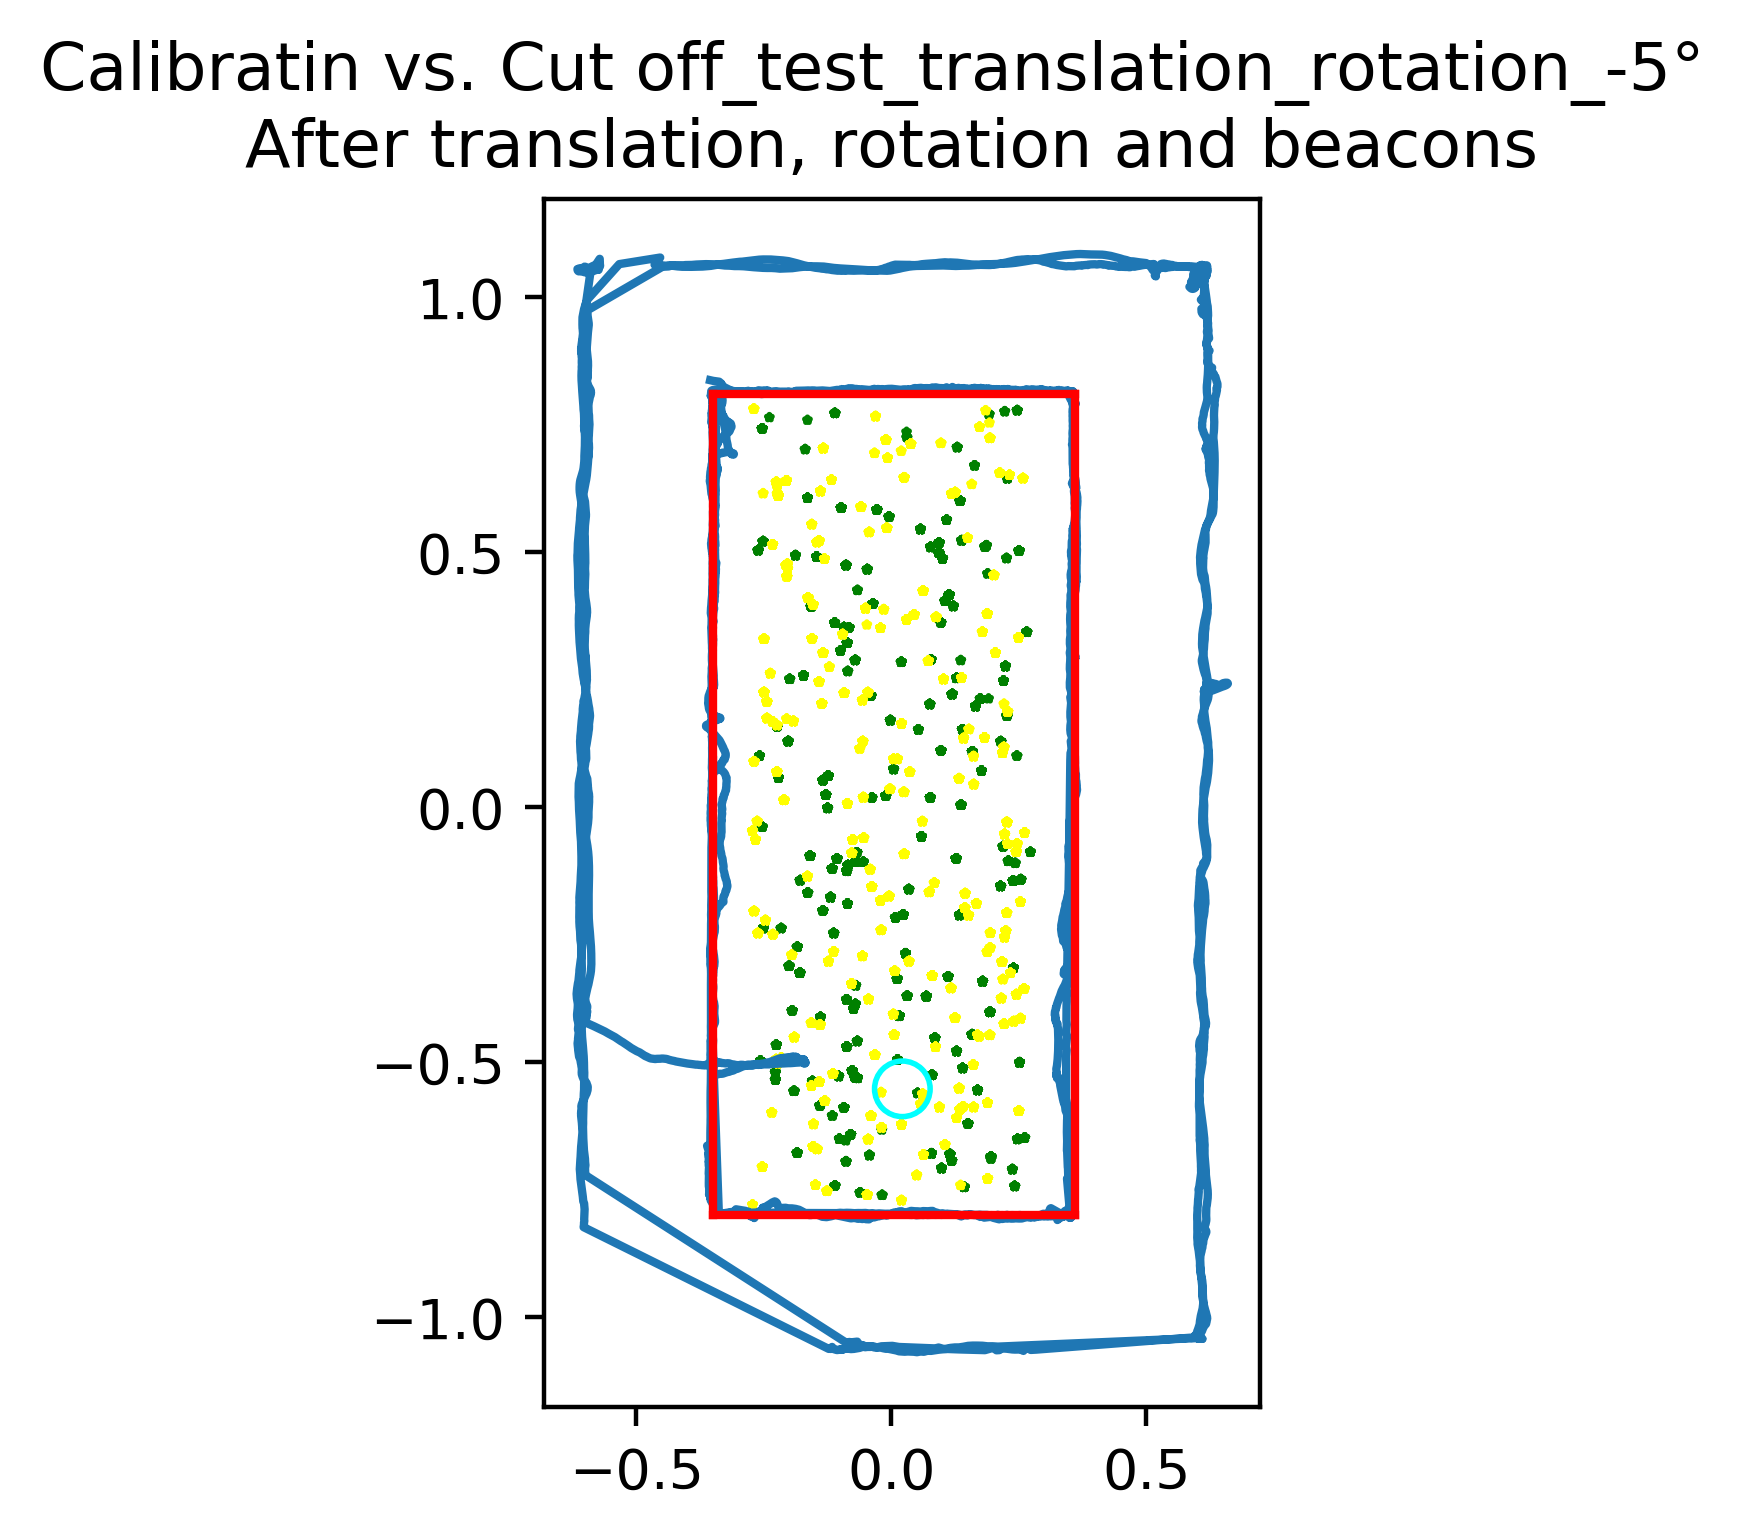

In [144]:

root3 = '//10.153.170.3/storage2/fabian/data/raw/Event_files_FS03/'
root4 = '//10.153.170.3/storage2/fabian/data/raw/Event_files_FS04/'
processed= 'C:/Users/Fabian/Desktop/Analysis/Round3_FS03_FS06/processed/'
FS03_beacon = pd.read_csv(root3+'beacons_20210312-172823.txt',sep=" ", header=None)
FS04_beacon = pd.read_csv(root4+'beacons_20210322-202458.txt',sep=" ", header=None)
rearing4 = pd.read_excel(processed +'FS04_rears.xlsx')
rearing3 = pd.read_excel(processed +'FS03_rears.xlsx')
rearing3 = rotation_correction_beacons(rearing3)
rearing4 = rotation_correction_beacons(rearing4)
fig, ax1 = plt.subplots(1, 1, sharex=True,dpi=400, sharey=True)
fig.suptitle("Calibratin vs. Cut off_test_translation_rotation_-5°")
ax1.plot(rot_position_data[1],rot_position_data[3])
ax1.plot([(X_cut_min+cut)-xcut_offset,(X_cut_max-cut)-xcut_offset],[(Y_cut_max-cut)+ycut_offset,(Y_cut_max-cut)+ycut_offset] ,'r-')
ax1.plot([(X_cut_min+cut)-xcut_offset,(X_cut_min+cut)-xcut_offset],[(Y_cut_min+cut)+ycut_offset,(Y_cut_max-cut)+ycut_offset] ,'r-')
ax1.plot([(X_cut_max-cut)-xcut_offset,(X_cut_max-cut)-xcut_offset],[(Y_cut_min+cut)+ycut_offset,(Y_cut_max-cut)+ycut_offset] ,'r-')
ax1.plot([(X_cut_max-cut)-xcut_offset,(X_cut_min+cut)-xcut_offset],[(Y_cut_min+cut)+ycut_offset,(Y_cut_min+cut)+ycut_offset] ,'r-')
ax1.scatter(rearing3["BeaconX"],rearing3["BeaconY"],s=1,marker='*', facecolors='none', edgecolors='green')
ax1.scatter(rearing4["BeaconX"],rearing4["BeaconY"],s=1,marker='*', facecolors='none', edgecolors='yellow')
#First beacon
xcylinder = 0.021457331
ycylinder = -0.5530283
xxcylinder = xcylinder * np.cos(alpha) - ycylinder * np.sin(alpha)
yycylinder = xcylinder * np.sin(alpha) + ycylinder * np.cos(alpha)
ax1.scatter(xxcylinder,yycylinder,s=100,marker='o', facecolors='none', edgecolors='cyan')
ax1.set_title('After translation, rotation and beacons ')
plt.gca().set_aspect('equal')
plt.savefig('%sCalibration vs. Cut off _test_translation_rotation_with beacons_rot_-5°.png'%(figures), dpi = 400)
plt.show()


### Conclusion: Got new hardcoded numbers and realized I have to move the beacons by a few degrees sicne new calibration. 

# Will need to change alpha from 5 to 1.7 (given I do not calibrate again) and x_diff should be enlarged to .71 isntead of .59 

## And got the calibration numbers 

In [131]:
X_cut_min = -.59
Y_cut_max = 1.61
X_cut_max = .12
Y_cut_min = .00
print("area %s M*2" %((X_cut_max-X_cut_min)*(Y_cut_max-Y_cut_min))) 
#Translations
xcut_offset=-.24
ycut_offset=-.8
#alpha
rotation=  1.7

area 1.1431 M*2


### GRAVEYARD: 
    

### Old Offest Used to be hardcoded 

In [6]:
x_max, x_min = 0.2, -0.76
x_offset = x_max - (x_max - x_min)/2
y_max, y_min = 0.072,  -1.754
y_offset = y_max - (y_max - y_min)/2
print(x_offset,y_offset)

-0.27999999999999997 -0.8410000000000001
